In [2]:
import numpy as np
import matplotlib.pyplot as plt
from generate import generate_vertex, generate_activation
from sac import calculate_sac, masked_sac
from ripser import ripser, lower_star_img
from persim import plot_diagrams
from mylower import my_lower_star_img
import dionysus as dio

## Generate grid vertices

In [3]:
#center
v0 = np.array([0,0])

#vectors for square grid
v1s = np.array([0,1])
v2s = np.array([1,0])

#vectors for triangular grid
v1t = np.array([1,0])
yt = np.sqrt(1**2-0.5**2)
v2t = np.array([0.5,yt])

vl = np.array([0,0.45])

vb = np.array([-1.1,0])


vertexs = generate_vertex(v0,v1s,v2s,[-2,3])
vertext = generate_vertex(v0,v1t,v2t,[-2,3])
vertexl = generate_vertex(v0,v0,vl,[-2,3])
vertexl = vertexl[:5]
vertexb = generate_vertex(vb,vb,vb,[0,1])

# Generate activation maps

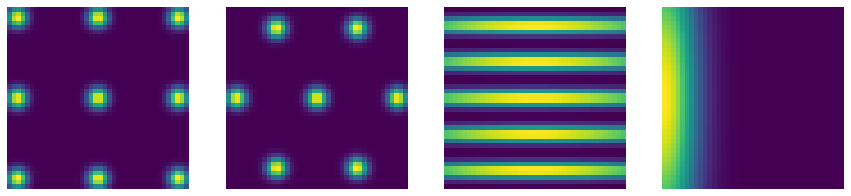

In [4]:
square_grid = generate_activation(vertexs)
triangular_grid = generate_activation(vertext)
lines = generate_activation(vertexl,sigmax=2,sigmay=0.1)
border = generate_activation(vertexb,sigmax=0.4,sigmay=2)

plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(square_grid)
plt.axis('off')
plt.subplot(142)
plt.imshow(triangular_grid)
plt.axis('off')
plt.subplot(143)
plt.imshow(lines)
plt.axis('off');
plt.subplot(144)
plt.imshow(border)
plt.axis('off');

# Calculate SAC

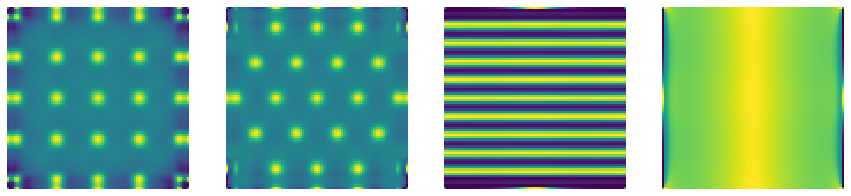

In [5]:
square_grid_sac = calculate_sac(square_grid)
triangular_grid_sac = calculate_sac(triangular_grid)
lines_sac = calculate_sac(lines)
border_sac = calculate_sac(border)

plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(square_grid_sac)
plt.axis('off')
plt.subplot(142)
plt.imshow(triangular_grid_sac)
plt.axis('off')
plt.subplot(143)
plt.imshow(lines_sac)
plt.axis('off');
plt.subplot(144)
plt.imshow(border_sac)
plt.axis('off');

# Mask SAC

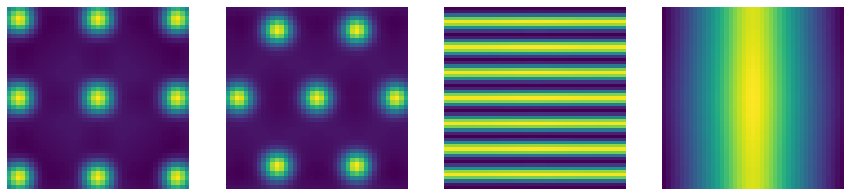

In [6]:
masked_square_grid_sac = masked_sac(square_grid_sac,19)
masked_triangular_grid_sac = masked_sac(triangular_grid_sac,19)
masked_lines_sac = masked_sac(lines_sac,11)
masked_border_sac = masked_sac(border_sac,19)

sacs_fig = plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(masked_square_grid_sac)
plt.axis('off')
plt.subplot(142)
plt.imshow(masked_triangular_grid_sac)
plt.axis('off')
plt.subplot(143)
plt.imshow(masked_lines_sac)
plt.axis('off');
plt.subplot(144)
plt.imshow(masked_border_sac)
plt.axis('off');

#list of masked sacs
masked_sacs=[masked_square_grid_sac,masked_triangular_grid_sac,masked_lines_sac, masked_border_sac]

# Compute Persistence homology with sci-kit tda and lower_star_img

/home/simone/anaconda3/envs/gc/lib/python3.7/site-packages/persim/visuals.py:165: UserWarning: Attempting to set identical left == right == -1.0 results in singular transformations; automatically expanding.
  ax.set_xlim([x_down, x_up])
/home/simone/anaconda3/envs/gc/lib/python3.7/site-packages/persim/visuals.py:166: UserWarning: Attempting to set identical bottom == top == -1.0 results in singular transformations; automatically expanding.
  ax.set_ylim([y_down, y_up])


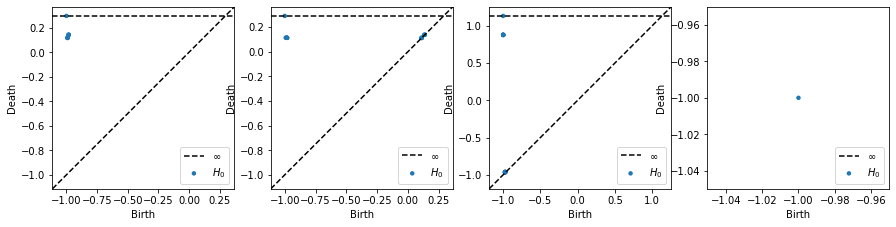

In [7]:
#compute persistence disgrams with ripser default lower_star_img
dgm_square = lower_star_img(-masked_square_grid_sac)
dgm_triangular = lower_star_img(-masked_triangular_grid_sac)
dgm_lines = lower_star_img(-masked_lines_sac)
dgm_border = lower_star_img(-masked_border_sac)


plt.figure(figsize=(15,5))
plt.subplot(141)
plot_diagrams(dgm_square)
plt.subplot(142)
plot_diagrams(dgm_triangular)
plt.subplot(143)
plot_diagrams(dgm_lines)
plt.subplot(144)
plot_diagrams(dgm_border)

dgms = [dgm_square,dgm_triangular,dgm_lines,dgm_border]

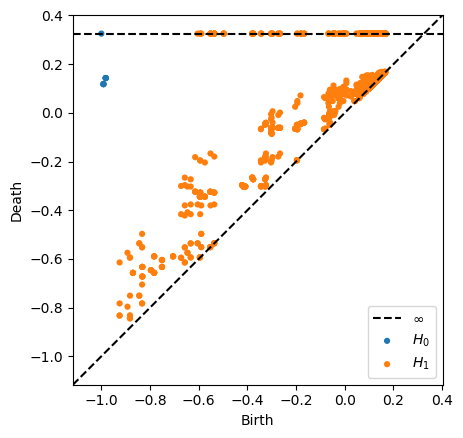

In [8]:
#compute persistence diagrams with modified lower_star_img

dgms = []

for m in masked_sacs:
    sdm = my_lower_star_img(-m)
    dgm = ripser(sdm,distance_matrix=True,maxdim=1)['dgms']
    dgms.append(dgm)
    
plot_diagrams(dgms[0])

# Compute persistence homology with Dionysus

In [9]:
dgmss = []
for sac in masked_sacs:
    filtration = dio.fill_freudenthal(sac,reverse = True)
    p = dio.homology_persistence(filtration)
    dgms = dio.init_diagrams(p, filtration)
    dgmss.append(dgms)
    
dgls = []
for dgms in dgmss:
    dgl = []
    for dgm in dgms:
        h=[]
        for point in dgm:
            bd = [-point.birth, -point.death]
            h.append(bd)
        ha = np.asarray(h)
        dgl.append(ha)
    dgls.append(dgl)

/home/simone/anaconda3/envs/gc/lib/python3.7/site-packages/persim/visuals.py:165: UserWarning: Attempting to set identical left == right == -1.0 results in singular transformations; automatically expanding.
  ax.set_xlim([x_down, x_up])
/home/simone/anaconda3/envs/gc/lib/python3.7/site-packages/persim/visuals.py:166: UserWarning: Attempting to set identical bottom == top == -1.0 results in singular transformations; automatically expanding.
  ax.set_ylim([y_down, y_up])


[[Diagram with 9 points, Diagram with 14 points, Diagram with 0 points],
 [Diagram with 15 points, Diagram with 10 points, Diagram with 0 points],
 [Diagram with 21 points, Diagram with 12 points, Diagram with 0 points],
 [Diagram with 1 points, Diagram with 0 points, Diagram with 0 points]]

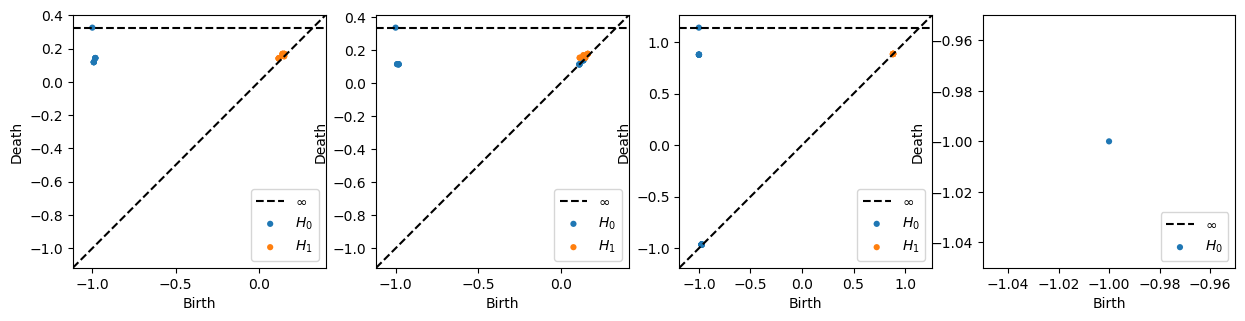

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(141)
plot_diagrams(dgls[0][:2])
plt.subplot(142)
plot_diagrams(dgls[1][:2])
plt.subplot(143)
plot_diagrams(dgls[2][:2])
plt.subplot(144)
plot_diagrams(dgls[3][:1])

dgmss

In [11]:
h1life = []
for i in range(3):
    h1 = np.column_stack((dgls[i][1],np.transpose(dgls[i][1][:,1]-dgls[i][1][:,0])))
    h1life.append(h1)

lmap = ['square','triangular','lines','border']
for i in range(len(lmap[:-1])):
    print(
        'max life h1', lmap[i], '=', '%0.4f'%np.max(h1life[i][:,2]), 'multiplicity =', np.sum(h1life[i][:,2] == np.max(h1life[i][:,2]))
    )

max life h1 square = 0.0250 multiplicity = 4
max life h1 triangular = 0.0389 multiplicity = 2
max life h1 lines = 0.0013 multiplicity = 4


# Increase sigma

In [12]:
squarespr = generate_activation(vertexs,sigmax=0.4,sigmay=0.4)
triangularspr = generate_activation(vertext,sigmax=0.4,sigmay=0.4)

squarespr_sac = calculate_sac(squarespr)
triangularspr_sac = calculate_sac(triangularspr)

msquarespr_sac = masked_sac(squarespr_sac,19)
mtriangularspr_sac = masked_sac(triangularspr_sac,19)

dgmss = []
for ms in [msquarespr_sac,mtriangularspr_sac]:
    filtration = dio.fill_freudenthal(ms,reverse = True)
    p = dio.homology_persistence(filtration)
    dgms = dio.init_diagrams(p, filtration)
    dgmss.append(dgms)

dgls = []
for dgms in dgmss:
    dgl = []
    for dgm in dgms:
        h=[]
        for point in dgm:
            bd = [-point.birth, -point.death]
            h.append(bd)
        ha = np.asarray(h)
        dgl.append(ha)
    dgls.append(dgl)

[[Diagram with 9 points, Diagram with 4 points, Diagram with 0 points],
 [Diagram with 11 points, Diagram with 10 points, Diagram with 0 points]]

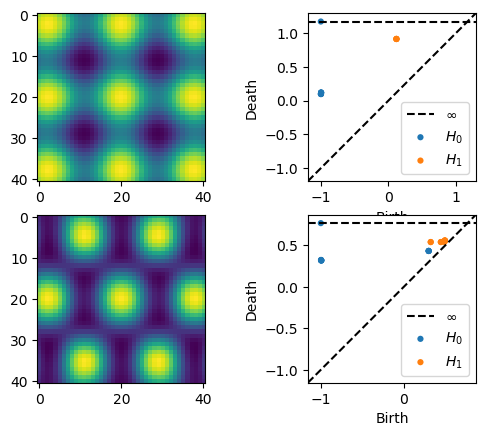

In [13]:
plt.figure()
plt.subplot(221)
plt.imshow(msquarespr_sac)
plt.subplot(222)
plot_diagrams(dgls[0][:2])
plt.subplot(223)
plt.imshow(mtriangularspr_sac)
plt.subplot(224)
plot_diagrams(dgls[1][:2])

dgmss

# Random activation maps

In [14]:
def gen_rand_sac():
    vertexran = np.random.uniform(low=-1.1, high=1.1, size=(4,2))
    mapran = generate_activation(vertexran, sigmax=np.random.uniform(high=0.7),sigmay=np.random.uniform(high=0.7))
    sacran = calculate_sac(mapran)
    return masked_sac(sacran,19)

def dgm_for_persim(msac):
    filtration = dio.fill_freudenthal(msac,reverse=True)
    p = dio.homology_persistence(filtration)
    dgms = dio.init_diagrams(p,filtration)
    
    dgl = []
    for dgm in dgms:
        h=[]
        for point in dgm:
            bd = [-point.birth, -point.death]
            h.append(bd)
        ha = np.asarray(h)
        dgl.append(ha)
    if len(dgl[1].shape)!=2:
        dgl[1] = np.array([(0,0),(0,0)])
    return dgl  

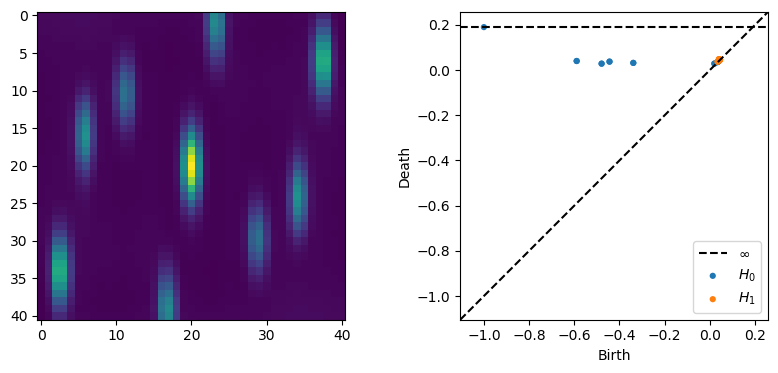

19 points in H0 and 20 points in H1


/home/simone/anaconda3/envs/gc/lib/python3.7/site-packages/persim/visuals.py:165: UserWarning: Attempting to set identical left == right == -0.0 results in singular transformations; automatically expanding.
  ax.set_xlim([x_down, x_up])
/home/simone/anaconda3/envs/gc/lib/python3.7/site-packages/persim/visuals.py:166: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([y_down, y_up])


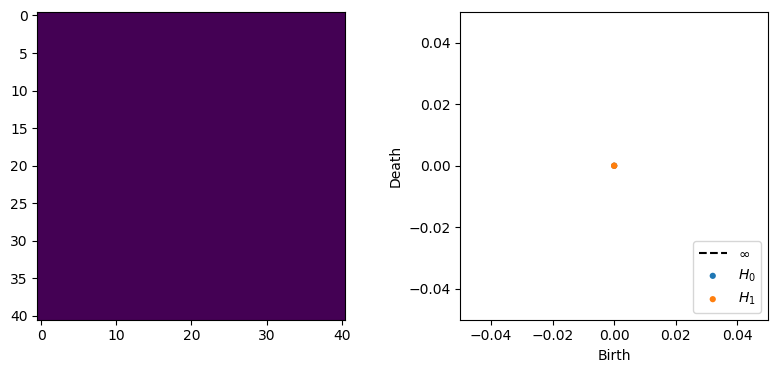

1 points in H0 and 2 points in H1


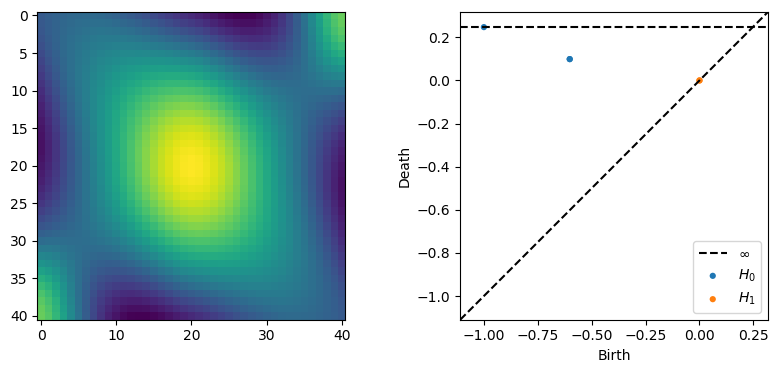

3 points in H0 and 2 points in H1


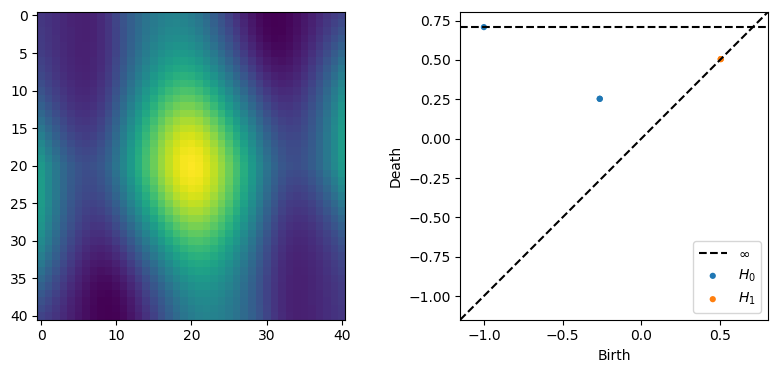

3 points in H0 and 2 points in H1


/home/simone/Desktop/Tesi/grid_code/gridness/manually generated activations/sac.py:57: RuntimeWarning: divide by zero encountered in true_divide
  x_coef = np.divide(covar, np.multiply(std_seq1, std_seq2))


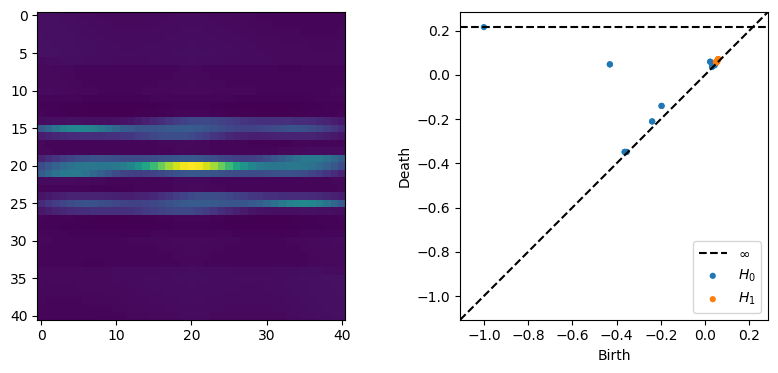

23 points in H0 and 12 points in H1


In [15]:
for i in range(5):
    rsac = gen_rand_sac()
    rdgl = dgm_for_persim(rsac)
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plt.imshow(rsac)
    plt.subplot(122)
    plot_diagrams(rdgl[:2])
    plt.show()
    print('%0.0f points in H0'%len(rdgl[0]),'and %0.0f points in H1'%len(rdgl[1]))